# Trabalho Pratico 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

dataset = pd.read_csv("data.csv", header=None)
Y = pd.read_csv("ids", header=None)

In [2]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19924 entries, 0 to 19923
Columns: 2209 entries, 0 to 2208
dtypes: float64(2209)
memory usage: 335.8 MB


,0,1,2,3,4,5,6,7,8,9,...,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208
0,0.077257,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.055755,0.0,0.0
2,0.042250,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.093693,0.0,0.099296,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.069105,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.036811,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.041917,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [3]:
Y.info()
Y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19924 entries, 0 to 19923
Data columns (total 1 columns):
0    19924 non-null object
dtypes: object(1)
memory usage: 155.7+ KB


,0
0,832e15531654188fa0b951faa5f68540dfb1ca5a
1,aa5163928a6edfd3bf69fd11fe763aacecf4602d
2,e886703afff0c70d6598bcae0c2d69a5a237807f
3,c1ea507b177b2e1673ce7a576057f91b75ae9d29
4,bbf73405c85d22702fafc1c0916e8f713810ff8d


We begin by exploring the data. The dimension is of 19924x2209, and a corresponding set of indexes 19924x1. Each of theses indexes is also the name of a file, in the docs/ folder, and theses files seem like random snippets of mailing lists and newsgroups. We expect a good metoid to be snippets of the same conversation.

We'll start by using the elbow method to find a good number of clusters.

In [4]:
Ks = np.arange(1, 1502, 100)
km = []
score = []
j = 0
for i in Ks:
    print(i)
    km.append(KMeans(n_clusters=i))
    score_i = km[j].fit(dataset).score(dataset)
    score.append(score_i)
    print("Score: ", score_i)
    j += 1

#plot(Ks,score)

1
Score:  -18320.8021089
101
Score:  -14116.2995369
201
Score:  -13170.4192973
301
Score:  -12675.7693276
401
Score:  -12328.3451326
501
Score:  -12065.6571996
601
Score:  -11810.94645
701
Score:  -11606.0793561
801
Score:  -11408.7367476
901
Score:  -11236.5880752
1001
Score:  -11059.6415017
1101
Score:  -10903.7601923
1201
Score:  -10736.0550325
1301
Score:  -10582.9450188
1401
Score:  -10439.2010107
1501
Score:  -10298.1156484


After choosing a number of groups we want, we'll find the indexes of the closest metoid for our data.

We'll then look at the snippets corresponding to a given group, and see if they talk about the same thing.

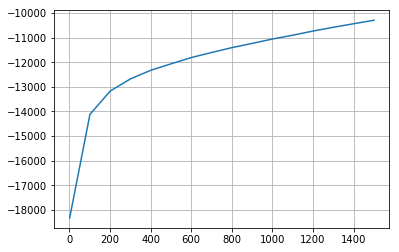

In [60]:
plt.plot(Ks,score)
plt.grid(True)
plt.show()

In [20]:
# chosen 100 arbitrarly for now, but we need to find the good number using the elbow method above
# 100 because we have 19924 files and my guess is about 200 snippets for each conversation (maybe that's a very bad guess)
chosen_km = KMeans(n_clusters=1500)
chosen_km.fit(dataset)
indexes = chosen_km.predict(dataset)
print(len(indexes))

19924


In [96]:
print(indexes[42])

72


In [97]:
# find 10 docs for cluster n°42
n_cluster = 42
j = 0
for (i,index) in enumerate(indexes):
    if index == n_cluster:
        print(Y.iloc[[i]])
        with open("docs/"+ Y[0][i]) as f:
            for line in f:
                if "Newsgroups" in line:
                    print (line)
                    break;

                                            0
689  12209308e6b64de3616038d0982d5428e924b24d
Newsgroups: misc.forsale,misc.computer.forsale,comp.sys.mac.databases

                                            0
726  e2f95eb4da4e0f9f38be5570cb6d551b46664886
Newsgroups: rec.food.cooking,sci.med

                                            0
972  22a2142b516b92e837134b918df5a1e9413f87cb
Newsgroups: sci.space

                                             0
1178  47dab535592241acb1c4d958a950872e31823449
Newsgroups: comp.os.ms-windows.misc

                                             0
1247  3249f7172b0dc946e263607dcf4801ba47d039dd
Newsgroups: rec.motorcycles

                                             0
1254  0905cbe757764cbe1ee278ca546e978e1b31acfc
Newsgroups: rec.motorcycles

                                             0
1327  76ddbd7225d38e5b3bebe2655fb4ef0fe4fcdb75
Newsgroups: comp.graphics

                                             0
1647  018093de876f1d3f84b9dfbd2186ea2c3fb7fde9


Reading theses documents, we notice that ALL of them are from the newsgroup "comp.graphics" (and other newsgroups, but comp.graphics is the link between them all).

Let's try another cluster:

In [98]:
# find 10 docs for cluster n°42
n_cluster = 12
j = 0
for (i,index) in enumerate(indexes):
    if index == n_cluster:
        print(Y.iloc[[i]])
        with open("docs/"+ Y[0][i]) as f:
            for line in f:
                if "Newsgroups" in line:
                    print (line)
                    break;


                                            0
240  c34a207f94dac5e1a7a931b5548129c0a9d1e176
Newsgroups: sci.crypt

                                            0
489  95b53e71b1e9dc0d486f592fc4d7d87cf890568a
Newsgroups: sci.med

                                            0
635  66185bf11ccbfe74808640bb7b5ce1fef1070428
Newsgroups: ca.politics,alt.fan.rush-limbaugh,talk.politics.misc

                                             0
1103  d24e3ee011d9d4877627d67a5f4192c4585fe960
Newsgroups: misc.forsale,misc.forsale.computers.other

                                             0
1131  eec01a25a826caae6a6e2ccc377a53ce7abc7fa8
Newsgroups: talk.religion.misc

                                             0
1420  37c758b07dae257ed7b9fb562857a46350f832ce
Newsgroups: sci.crypt,alt.security

                                             0
1786  48baafd0c3d26e410fb146b112b3a77a49926fab
Newsgroups: talk.religion.misc,talk.politics.misc,sci.skeptic

                                             0
1904 

That's not very satisfatory, we'll try using another number of clusters. Checking the graphic above, we can see that 200 clusters can be a satisfatory number of clusters, since the Sum of squared distances for each centroid-data is slowing down the slope.

In [101]:
chosen_km_2 = KMeans(n_clusters=200)
chosen_km_2.fit(dataset)
indexes_2 = chosen_km_2.predict(dataset)
print(len(indexes_2))

19924


In [102]:
n_cluster = 42
j = 0
for (i,index) in enumerate(indexes_2):
    if index == n_cluster:
        print(Y.iloc[[i]])
        with open("docs/"+ Y[0][i]) as f:
            for line in f:
                if "Newsgroups" in line:
                    print (line)
                    break;
        
        j += 1

                                            0
281  726b206299cb9e593a513ea01b6545bd4c21595b
Newsgroups: alt.conspiracy,talk.politics.misc,talk.religion.misc

                                             0
1344  730a3b4e053dd230232e2b7ccb8a866c3de87958
Newsgroups: rec.motorcycles,rec.motorcycles.racing,ba.motorcycles

                                             0
1511  50dbe3e88e325d5626e3c9db12b9a240aacff45e
Newsgroups: rec.motorcycles

                                             0
1605  0447100ced45231e80718cf9516ef325c1613168
Newsgroups: talk.politics.guns

                                             0
1808  b2e8db8eb7f2772f047667f3ea3b0fbdb3630d62
Newsgroups: rec.autos

                                             0
1883  cc99dbe8949107aadb6ba81f6bea68938fbe5445
Newsgroups: rec.autos

                                             0
1888  87114df4d66db802303caf2c439267a3e385cb39
Newsgroups: talk.politics.misc,alt.politics.usa.misc,alt.politics.libertarian,alt.politics.clinton,alt.p

In [103]:
n_cluster = 90
j = 0
for (i,index) in enumerate(indexes_2):
    if index == n_cluster:
        print(Y.iloc[[i]])
        with open("docs/"+ Y[0][i]) as f:
            for line in f:
                if "Newsgroups" in line:
                    print (line)
                    break;
        
        j += 1

                                            0
568  3cd2f5873ceb0d4967ca29ac7c49dda09c11f4a6
Newsgroups: rec.sport.hockey

                                            0
948  36c5a78d7abb10c86ec87ac88b9e273d51b6e334
Newsgroups: rec.sport.hockey

                                             0
1395  85e10be9c12d230c7e0c571d03297f3365d6c1a7
Newsgroups: rec.sport.baseball

                                             0
1461  d16f948392f944e7c4ff905089586d5564e2d3bd
Newsgroups: rec.sport.hockey

                                             0
1877  49fcef2d3366dfc9e59f27816f44f9ac37d2ed30
Newsgroups: bit.listserv.games-l,comp.sys.ibm.pc.games,misc.forsale

                                             0
2388  8c39e2f8497cb99edcda248c361c1acd9980c955
Newsgroups: rec.sport.baseball

                                             0
2510  b3fca0c7a173b02b221b04daffb4d2f892bac245
Newsgroups: rec.sport.hockey

                                             0
2584  a1b4c7a113efcc634b1766ae33ae6ea7d17d3e62

For this example, it doesn't work as well. This time the samples are about fairly large subjects (and different newsgroups) like baseball, politics and IBM hardware, but some are from the same topic. This suggests maybe the number of clusters isn't high enough.

Now we'll try to do PCA to reduce the number of features. First we'll find a good number of components:

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(dataset)
for i in range(-10,10):
    a = 0
    for x in pca.explained_variance_:
        if x < pow(10,i):
            a = a + 1
    print("< 10^"+str(i)+": "+str(a))

< 10^-10: 0
< 10^-9: 0
< 10^-8: 0
< 10^-7: 1
< 10^-6: 3
< 10^-5: 15
< 10^-4: 489
< 10^-3: 2050
< 10^-2: 2206
< 10^-1: 2209
< 10^0: 2209
< 10^1: 2209
< 10^2: 2209
< 10^3: 2209
< 10^4: 2209
< 10^5: 2209
< 10^6: 2209
< 10^7: 2209
< 10^8: 2209
< 10^9: 2209


We'll try to keep 1700 features, thus disregarding the ~500 features with a covariance inferiour to 10^-4. This will already help a lot with the calculations.

In [25]:
pca.n_components = 1700
X_reduced = pca.fit_transform(dataset)
X_reduced.shape

(19924, 1700)

In [27]:
Ks = np.arange(1, 1000, 100)
kmPCA = []
scorePCA = []
j = 0
for i in Ks:
    print(i)
    km.append(KMeans(n_clusters=i))
    score_i = km[j].fit(X_reduced).score(X_reduced)
    scorePCA.append(score_i)
    print("Score: ", score_i)
    j += 1

1
Score:  -17591.013636
101
Score:  -13394.8200815
201
Score:  -12441.0955908
301
Score:  -11952.1770653
401
Score:  -11599.4618213
501
Score:  -11336.5966221
601
Score:  -11096.7923083
701
Score:  -10890.4408981
801
Score:  -10702.472719
901
Score:  -10522.323233


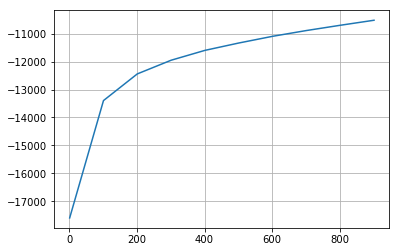

In [45]:
plt.plot(Ks,scorePCA)
plt.grid(True)
plt.show()

In [47]:
chosen_km_PCA = KMeans(n_clusters=500)
chosen_km_PCA.fit(X_reduced)
indexes_PCA = chosen_km_PCA.predict(X_reduced)
print(len(indexes_PCA))

19924


In [93]:
# find 10 docs for cluster n°42
n_cluster = 42
j = 0
for (i,index) in enumerate(indexes_PCA):
    if index == n_cluster:
        print(Y.iloc[[i]])
        with open("docs/"+ Y[0][i]) as f:
            for line in f:
                if "Newsgroups" in line:
                    print (line)
                    break;

                                           0
44  719ee182ed3233c1406a8f407b06c23e74b048e5
Newsgroups: talk.religion.misc,talk.politics.guns,soc.culture.jewish

                                            0
242  09ca874e67918917227320c4c8d098580b28c5a1
Newsgroups: talk.religion.misc,talk.politics.guns,soc.culture.jewish,rec.arts.books

                                            0
673  8d85de476131d1eb59bf6a93ce70ebe54591a04e
Newsgroups: talk.religion.misc,talk.politics.guns,soc.culture.jewish

                                            0
881  38bcb5d969f9c7b32d9835089f4bab7b2baf39a8
Newsgroups: talk.religion.misc,talk.politics.guns,soc.culture.jewish

                                             0
1053  196301f12c15a5e18925a5482f2bbaafa2fbf9b2
Newsgroups: talk.religion.misc,talk.politics.guns,soc.culture.jewish

                                             0
1405  968c9145f99c32dc6eb40145859b8d4cc2381027
Newsgroups: talk.religion.misc,talk.politics.guns,soc.culture.jewish

           

In [100]:
# find 10 docs for cluster n°42
n_cluster = 12
j = 0
for (i,index) in enumerate(indexes_PCA):
    if index == n_cluster:
        print(Y.iloc[[i]])
        with open("docs/"+ Y[0][i]) as f:
            for line in f:
                if "Newsgroups" in line:
                    print (line)
                    break;

                                             0
1014  6d43331b34c4d3ec4eeff0b5fab6f98e97895673
Newsgroups: alt.atheism

                                             0
3532  6bb03062bb3d056ebb230fa95d47785fe669633f
Newsgroups: alt.atheism

                                             0
3989  836a1fc892e80784565cb997f3521e3671e5b46f
Newsgroups: comp.graphics

                                             0
5394  046a2723eaaa9ad6fcb952a28f3deb6f4d7fc203
Newsgroups: alt.atheism

                                             0
5552  366bc095cf2c068e0392e221bbb5993877085e9a
Newsgroups: alt.atheism

                                             0
5868  d57515290be2f030aae1938577631e14f1034447
Newsgroups: alt.atheism

                                             0
5970  a7e52d4c8fb130064cc74fc350b73a4b9162e6a6
Newsgroups: alt.atheism

                                             0
8629  78e026538247769152275fbd11a0cc209d6f983c
Newsgroups: alt.atheism

                                             0